In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [6]:
df = pd.read_csv("../data/adult.csv")

df = df.replace("?", pd.NA).dropna()

valid_salary_values = ["<=50K", ">50K"]
df = df[df["salary"].isin(valid_salary_values)]

df["salary K$"] = pd.to_numeric(df["salary K$"], errors="coerce")
df = df.dropna(subset=["salary K$"])

df["salary K$"] = df["salary K$"].astype(int)

df.to_csv("cleaned_data.csv", index=False)

df.head()


,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [8]:
gender_counts = df["sex"].value_counts()
print(gender_counts)

Male      20380
Female     9782
Name: sex, dtype: int64


# Task 2
Find the average age of men in dataset

In [9]:
average_age_men = df[df["sex"] == "Male"]["age"].mean()
print(average_age_men)


39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [10]:
total_people = df.shape[0]
poland_people = df[df["native-country"] == "Poland"].shape[0]
percentage_poland = (poland_people / total_people) * 100
print(percentage_poland)


0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [11]:
mean_age_gt_50k = df[df["salary"] == ">50K"]["age"].mean()
std_age_gt_50k = df[df["salary"] == ">50K"]["age"].std()

mean_age_le_50k = df[df["salary"] == "<=50K"]["age"].mean()
std_age_le_50k = df[df["salary"] == "<=50K"]["age"].std()

print(f"Mean age for >50K: {mean_age_gt_50k}, Std Dev: {std_age_gt_50k}")
print(f"Mean age for <=50K: {mean_age_le_50k}, Std Dev: {std_age_le_50k}")


Mean age for >50K: 43.95911028236548, Std Dev: 10.269632835673852
Mean age for <=50K: 36.60806038668668, Std Dev: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [13]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
people_without_higher_education_high_salary = df[(~df["education"].isin(higher_education)) & (df["salary"] == ">50K")]

if not people_without_higher_education_high_salary.empty:
    print("Exist")
else:
    print("Not exist")


Exist


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [16]:
age_statistics_by_education = df.groupby("education")["age"].describe()
print(age_statistics_by_education)


               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [17]:
married_men = df[(df["sex"] == "Male") & (df["marital-status"].str.startswith("Married"))]
non_married_men = df[(df["sex"] == "Male") & (~df["marital-status"].str.startswith("Married"))]

married_men_salary_counts = married_men["salary"].value_counts()
non_married_men_salary_counts = non_married_men["salary"].value_counts()

print("Married:")
print(married_men_salary_counts)
print("\nNot married:")
print(non_married_men_salary_counts)


Married:
<=50K    7052
>50K     5723
Name: salary, dtype: int64

Not married:
<=50K    6932
>50K      673
Name: salary, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [18]:
max_hours_per_week = df["hours-per-week"].max()
num_people_working_max_hours = df[df["hours-per-week"] == max_hours_per_week].shape[0]

print(f"Max hours per week: {max_hours_per_week}")
print(f"Number of people working {max_hours_per_week} hours per week: {num_people_working_max_hours}")


Max hours per week: 99
Number of people working 99 hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

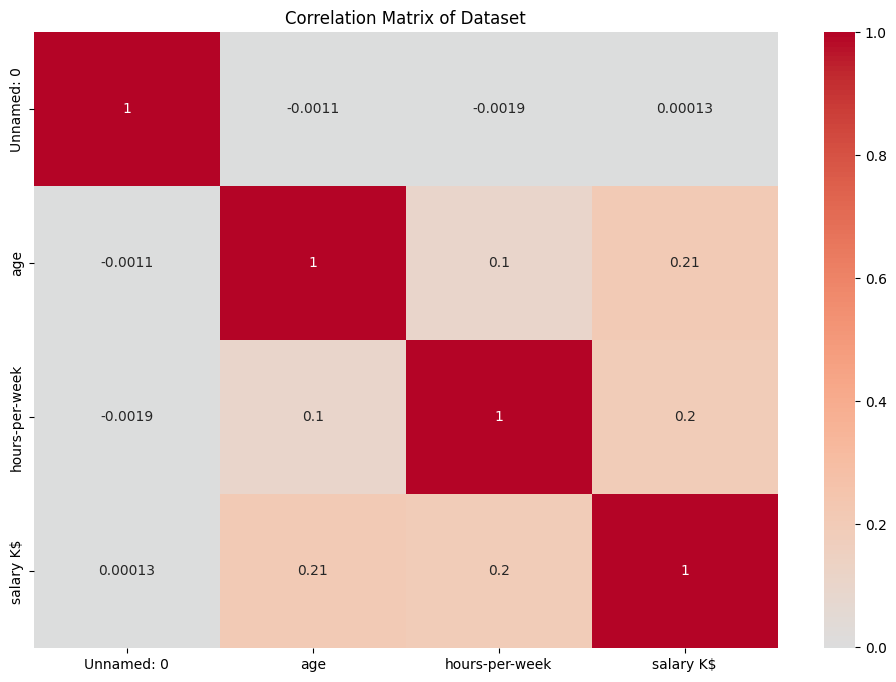

In [20]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Dataset")
plt.show()
